# Data Analysis on Electric Vehicle



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualizations
%matplotlib inline
sns.set(style="whitegrid")

# For interactive plots
import plotly.express as px

# To handle missing values visualization
from missingno import bar

In [2]:
df = pd.read_csv('dataset (1).csv')


df.head()


VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [4]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [5]:
#!pip install missingno

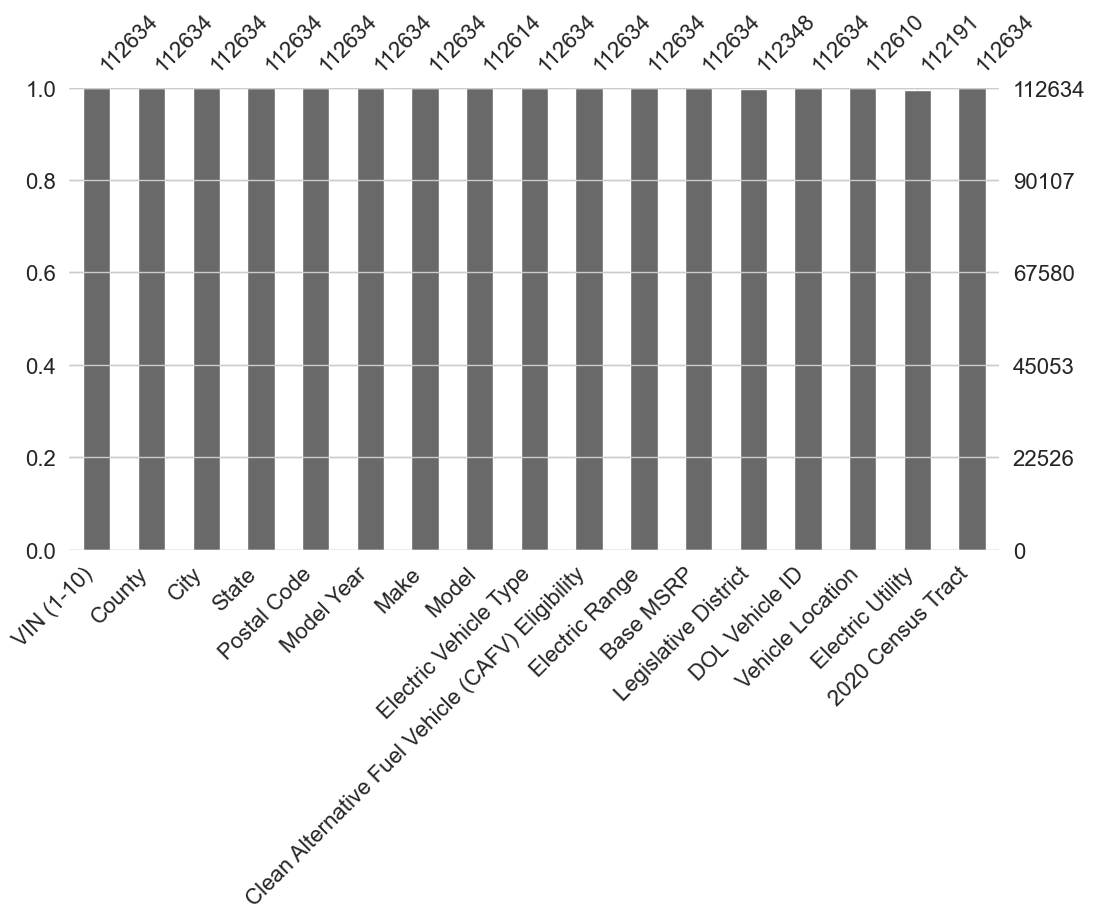

In [6]:
import missingno as msno
msno.bar(df, figsize=(12,6))
plt.show()

In [7]:
df['Model'].fillna('Unknown', inplace=True)
df['Vehicle Location'].fillna('Unknown', inplace=True)
df['Electric Utility'].fillna('Unknown', inplace=True)

In [8]:
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True)

In [9]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64




### 1.3. Univariate Analysis

Univariate analysis involves analyzing individual variables to understand their distribution and central tendencies.

In [10]:
# Numerical Features
numerical_features = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
                      'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

print(df[numerical_features].describe())




         Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112634.000000    1.126340e+05       1.126340e+05  
mean              29.816254    1.994567e+08       5.296650e+10  
std               14.683387    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08 

###  Distribution of Numerical Features

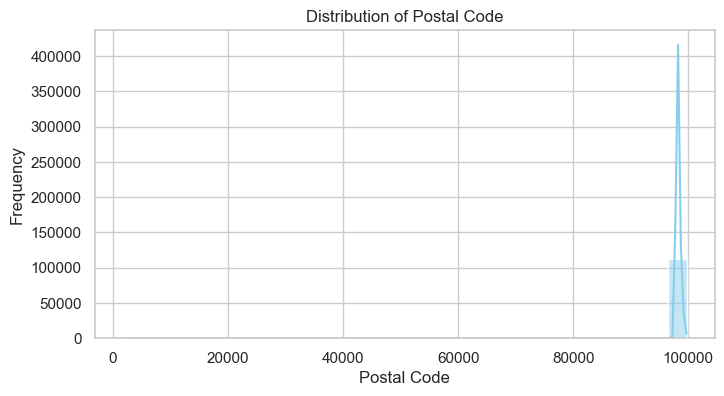

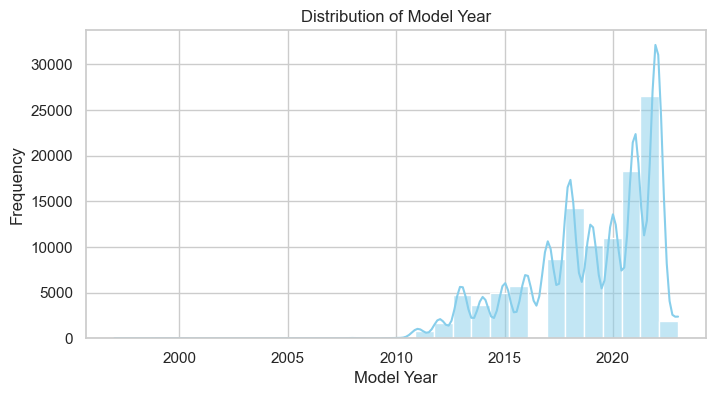

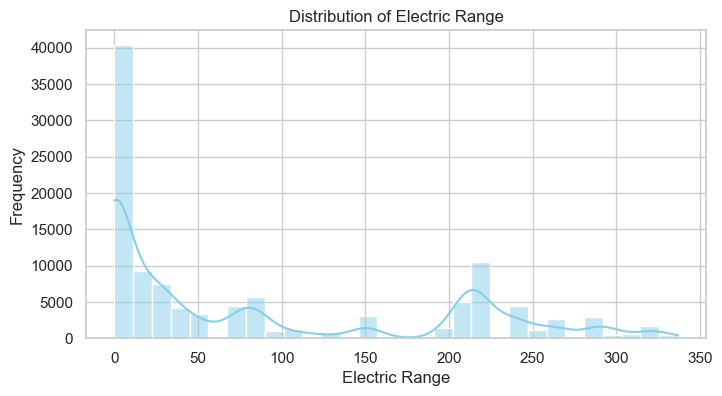

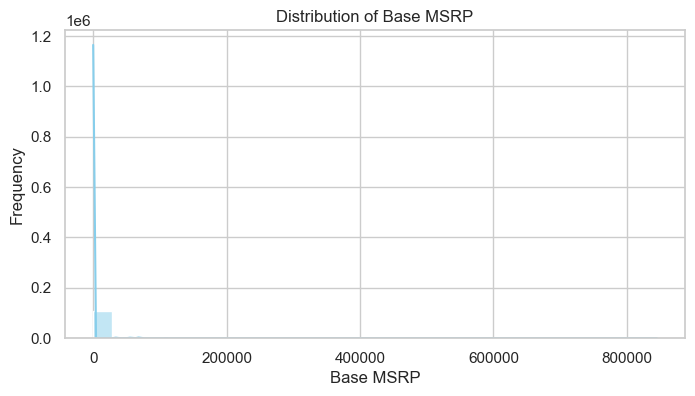

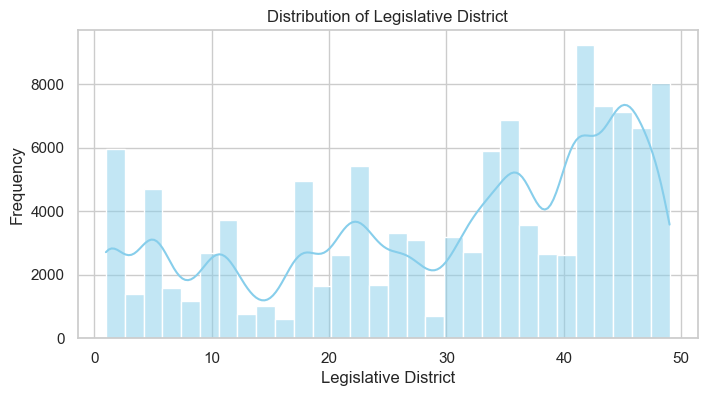

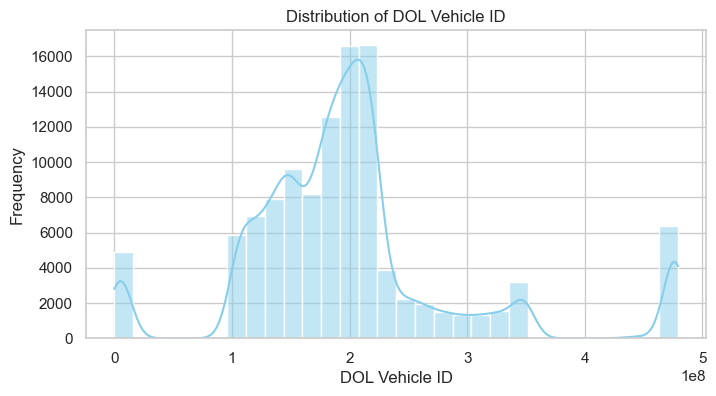

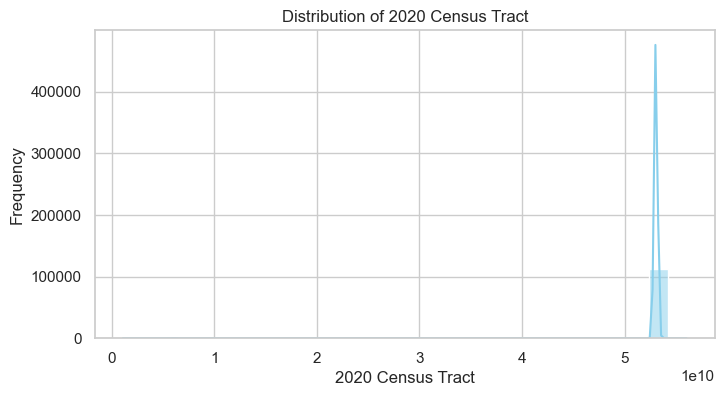

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### Distribution of Categorical Features

In [12]:
categorical_features = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 
                        'Model', 'Electric Vehicle Type', 
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
                        'Vehicle Location', 'Electric Utility']



C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


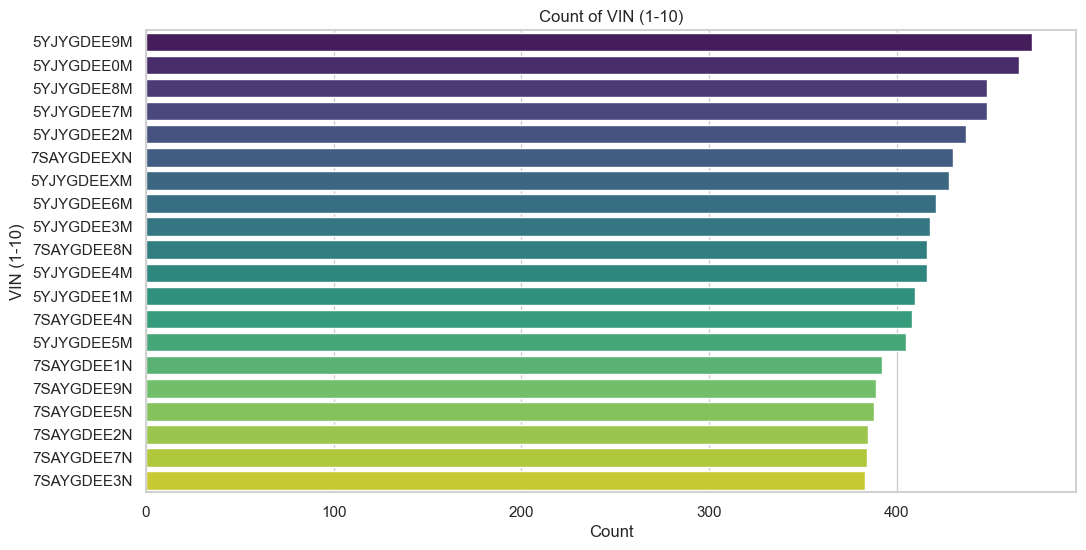

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


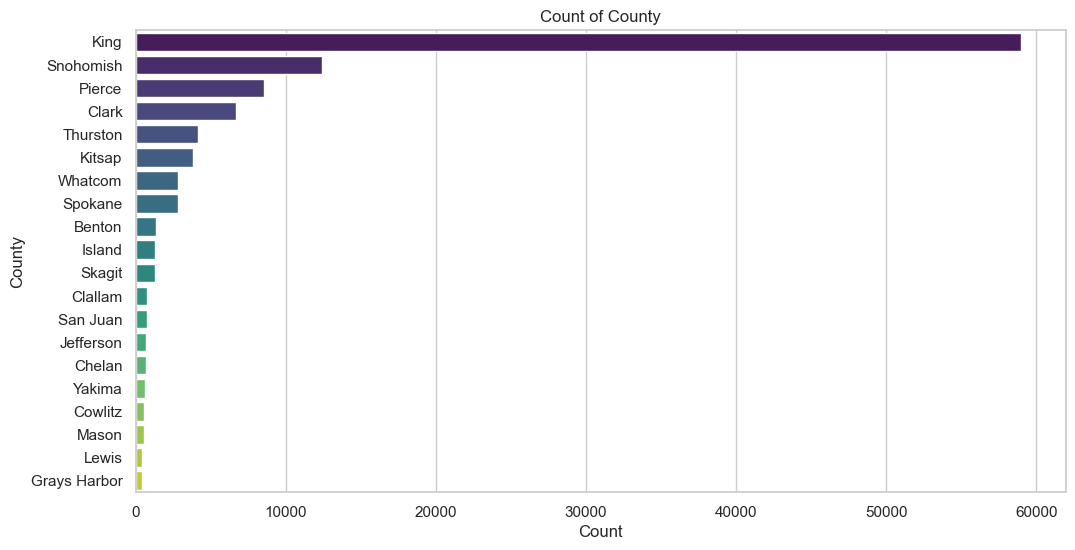

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


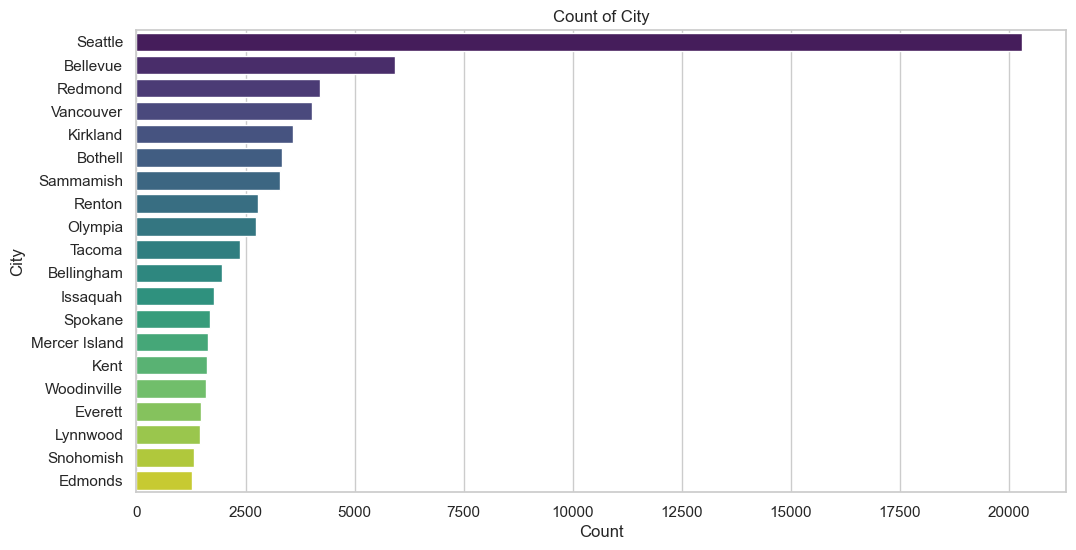

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


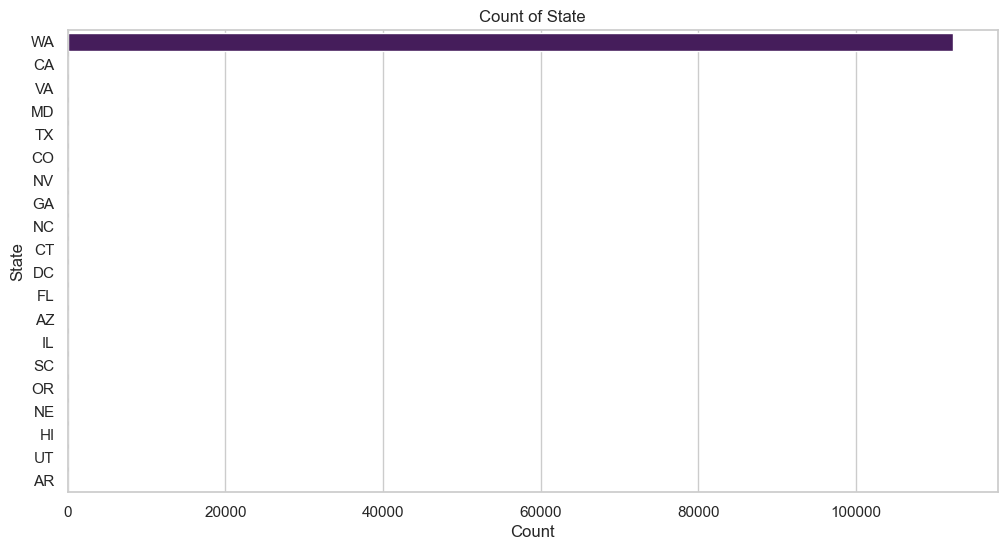

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


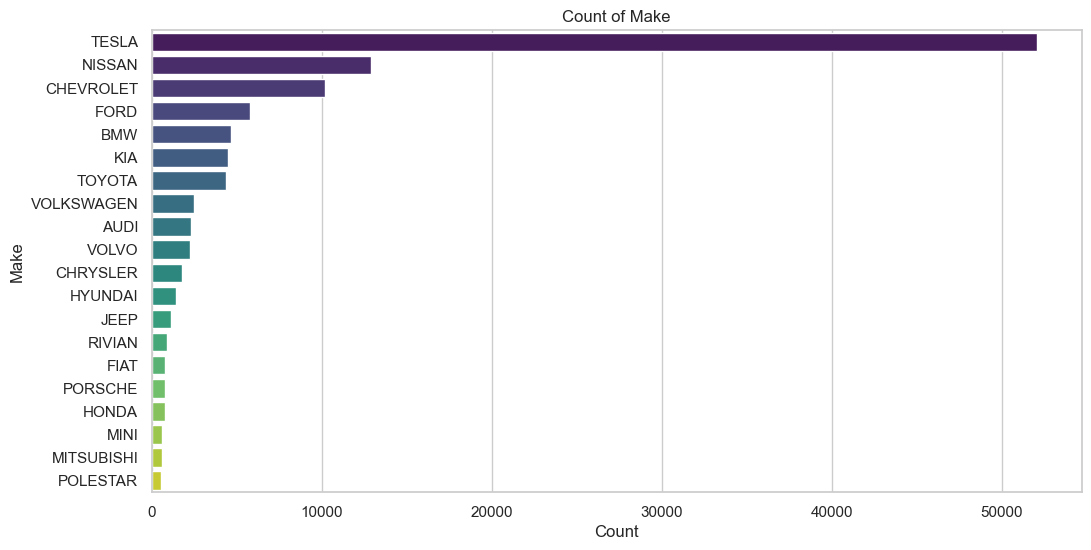

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


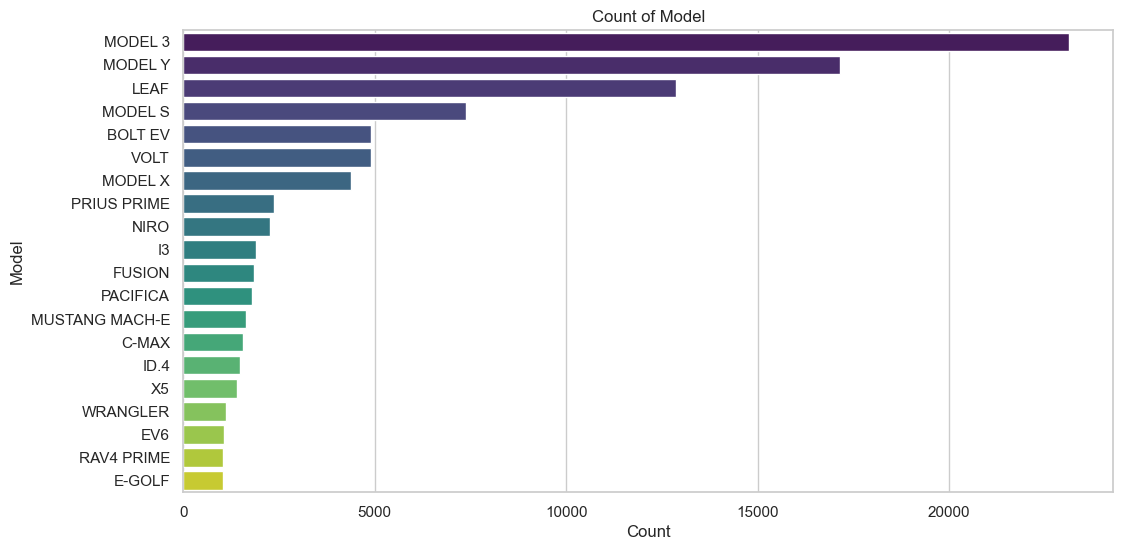

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


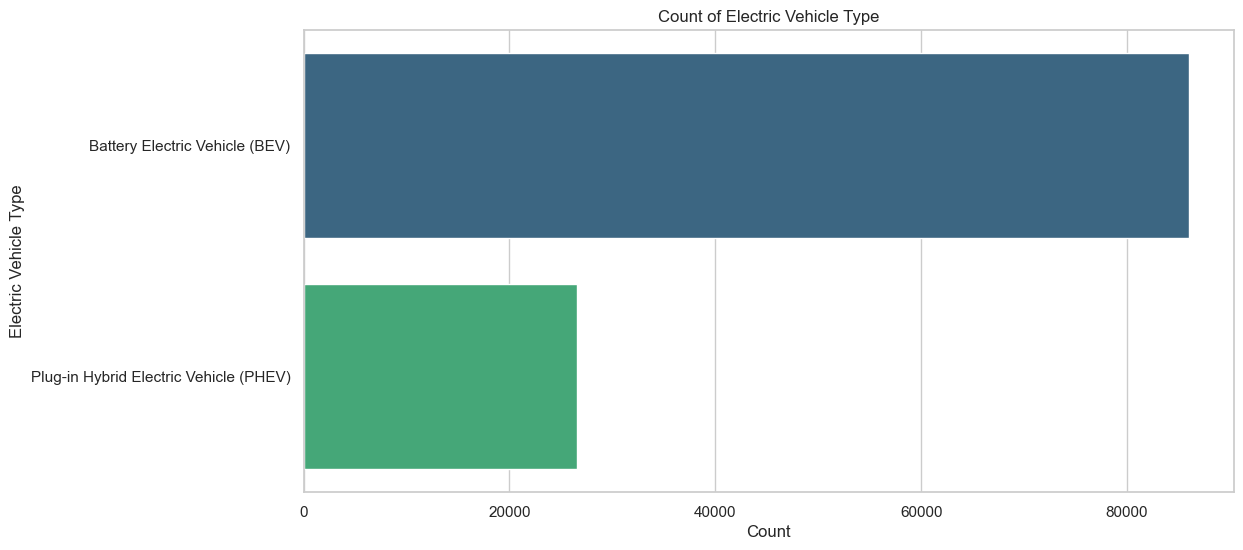

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


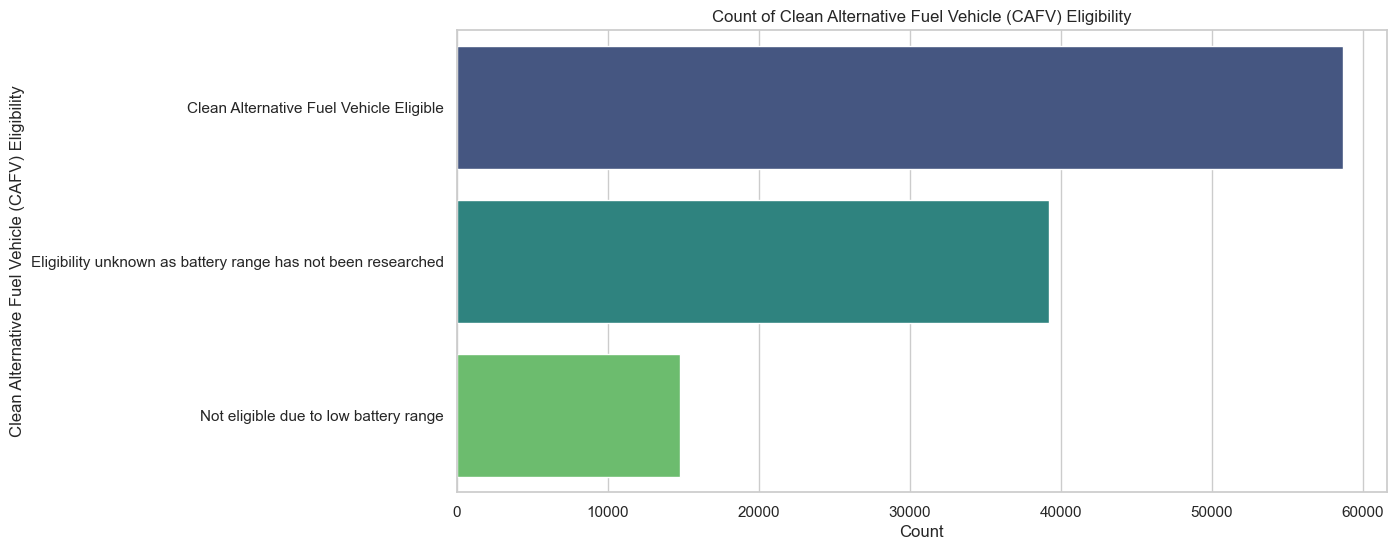

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


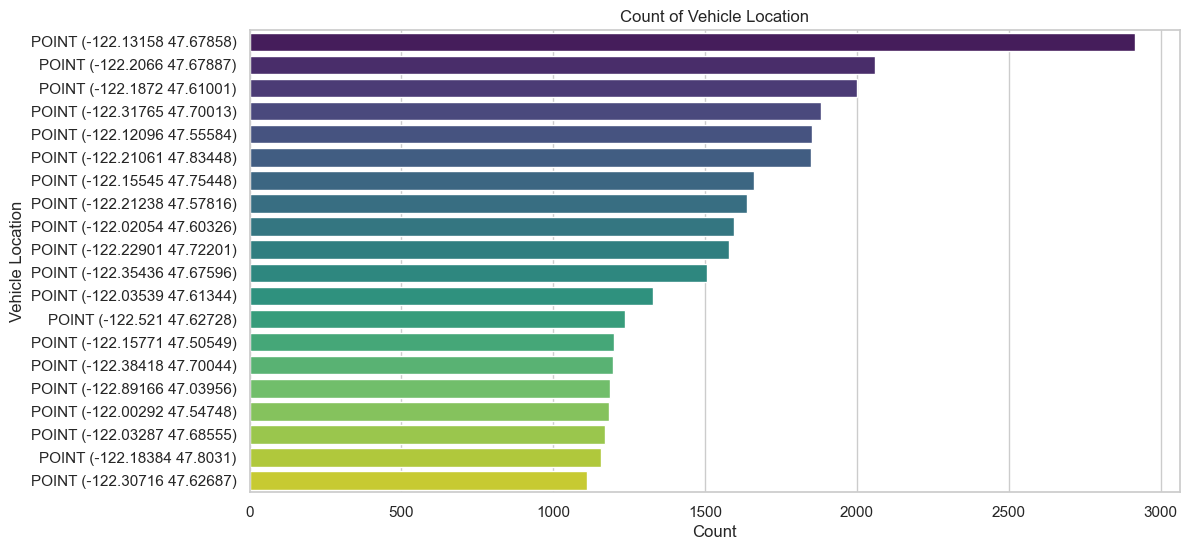

C:\Users\sneha\AppData\Local\Temp\ipykernel_5744\1252955198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')


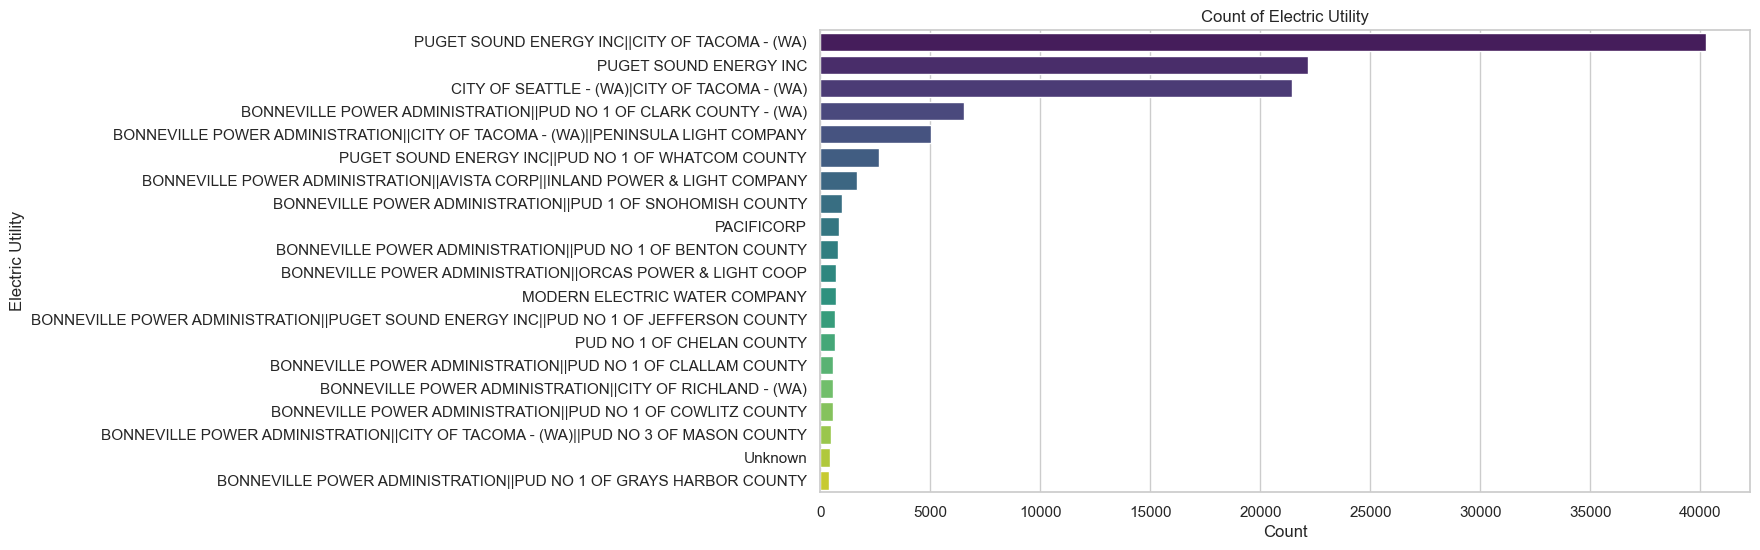

In [13]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().iloc[:20].index, palette='viridis')
    plt.title(f'Count of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


1.5. Bivariate Analysis
Bivariate analysis examines the relationship between two variables.

 ### Correlation Heatmap for Numerical Features

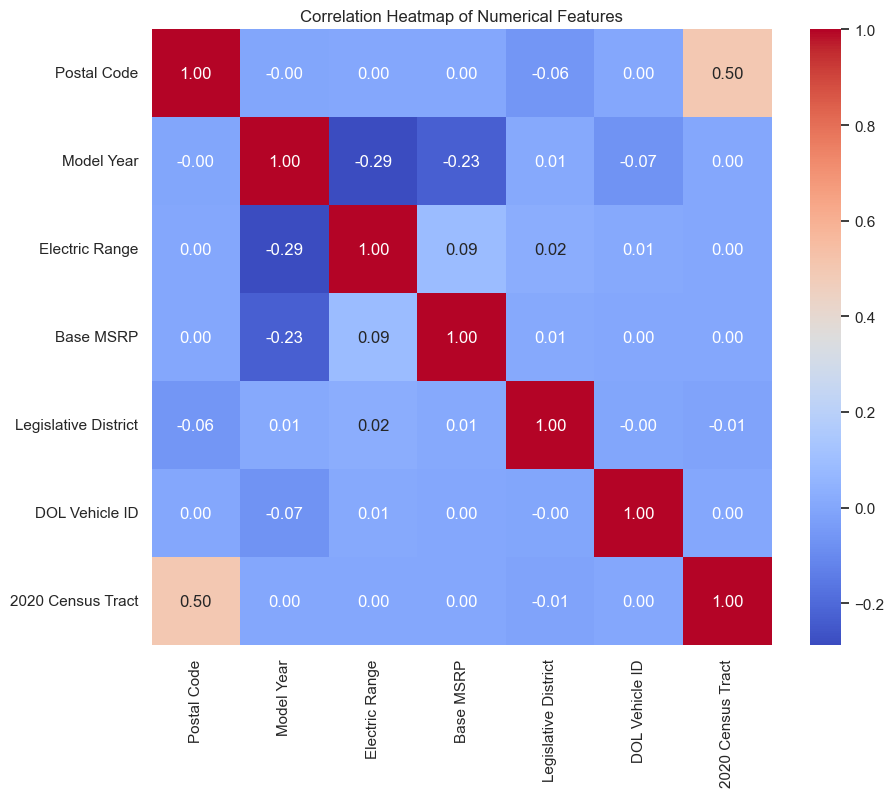

In [14]:
plt.figure(figsize=(10, 8))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### Scatter Plots

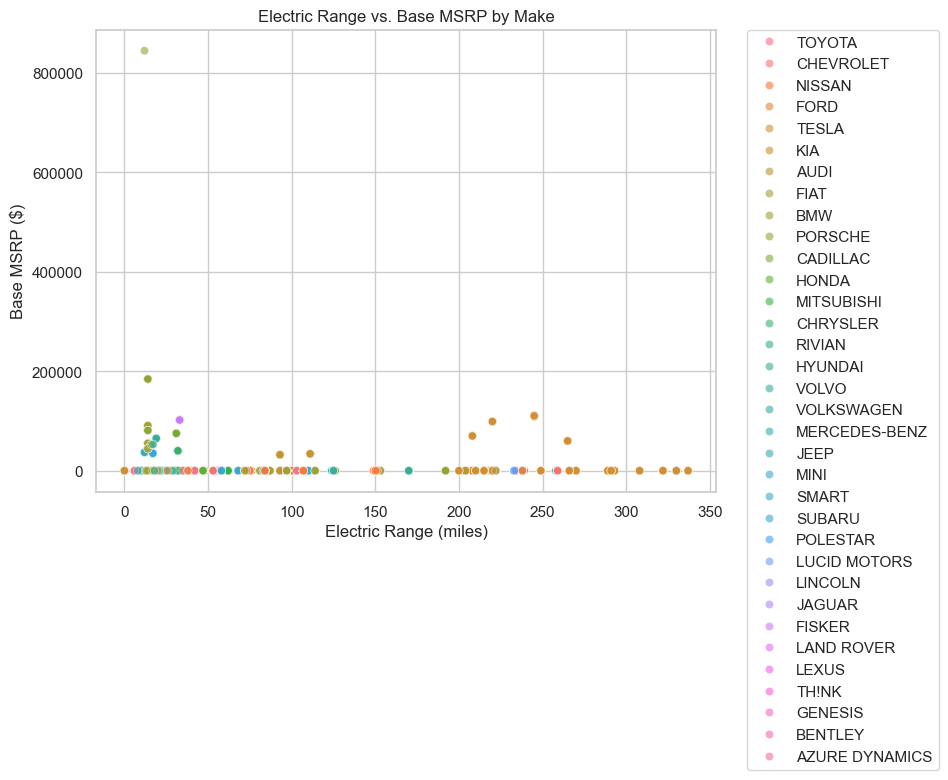

In [15]:
# Example 1: Electric Range vs. Base MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP', hue='Make', alpha=0.6)
plt.title('Electric Range vs. Base MSRP by Make')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



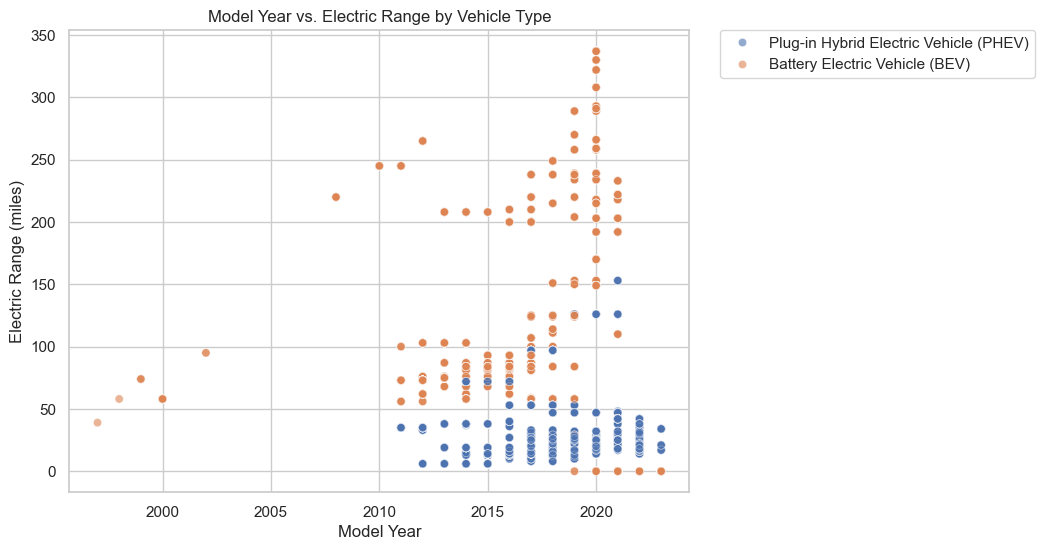

In [16]:
# Example 2: Model Year vs. Electric Range
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Model Year', y='Electric Range', hue='Electric Vehicle Type', alpha=0.6)
plt.title('Model Year vs. Electric Range by Vehicle Type')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### Box Plots for Categorical vs. Numerical

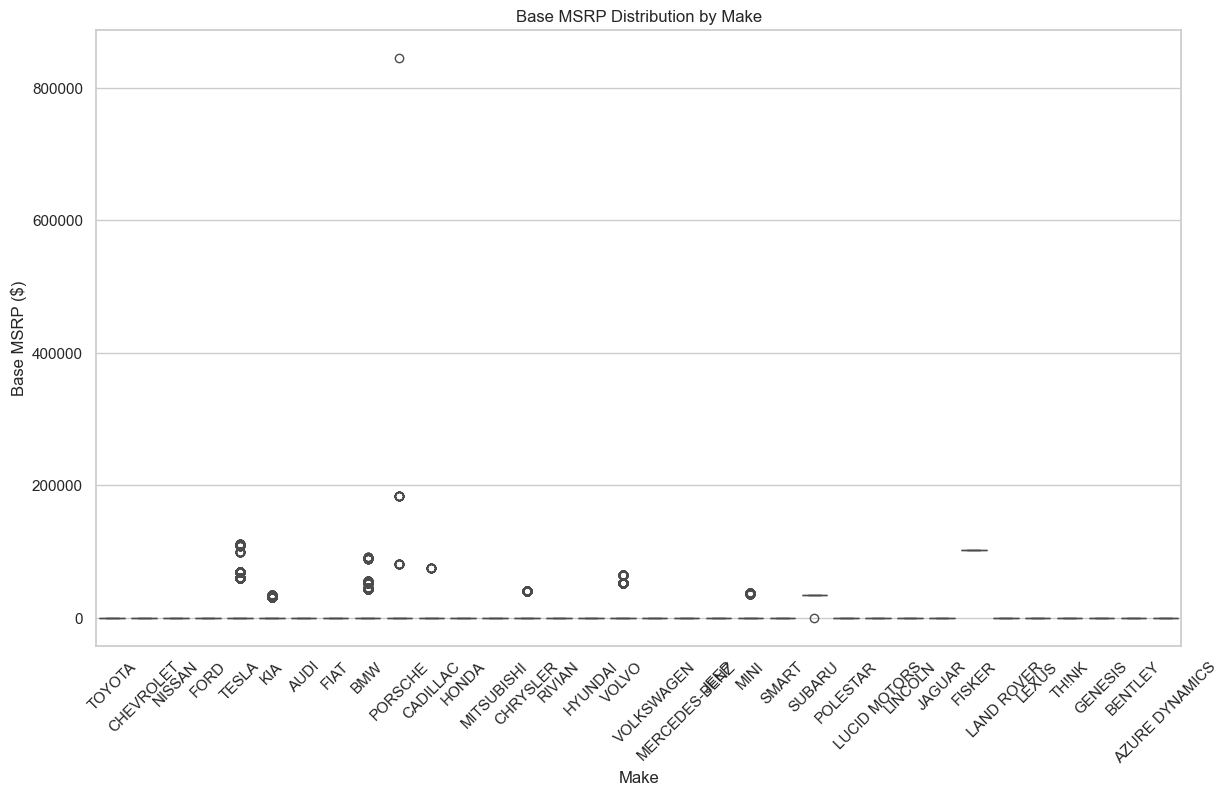

In [17]:
# Example: Base MSRP by Make
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Make', y='Base MSRP')
plt.title('Base MSRP Distribution by Make')
plt.xlabel('Make')
plt.ylabel('Base MSRP ($)')
plt.xticks(rotation=45)
plt.show()



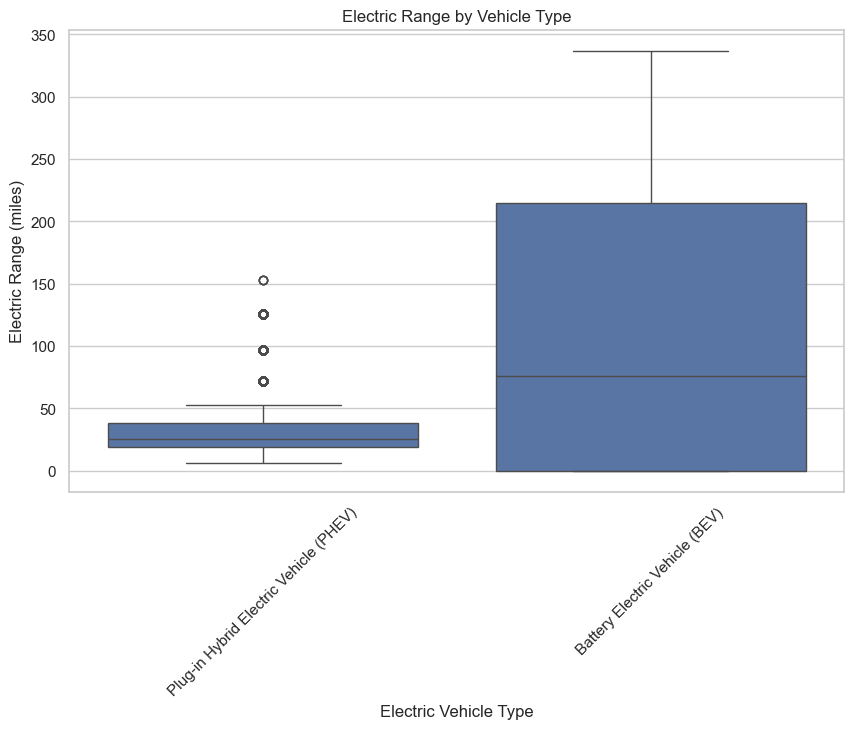

In [18]:
# Example: Electric Range by Electric Vehicle Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Electric Vehicle Type', y='Electric Range')
plt.title('Electric Range by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()


# Task 2: Create a Choropleth Map Using Plotly Express

In [19]:
# Aggregating EV counts by State
choropleth_data_state = df.groupby('State').agg({'VIN (1-10)': 'count'}).reset_index()
choropleth_data_state.rename(columns={'VIN (1-10)': 'EV_Count'}, inplace=True)

# Ensure state abbreviations are in the correct format for Plotly
# If 'State' is in full name, set locationmode to 'country names' with region 'USA-states'

# Example: If 'State' contains state abbreviations like 'CA', 'NY', etc.
# locationmode should be 'USA-states'

# Verify unique state entries
print(choropleth_data_state['State'].unique())


['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL'
 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MN' 'MO' 'MS' 'NC' 'ND' 'NE' 'NH' 'NJ'
 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA'
 'WA' 'WI' 'WY']


In [20]:
fig = px.choropleth(
    choropleth_data_state,
    locations='State',
    locationmode='USA-states',  # Use 'country names' if using country names
    color='EV_Count',
    scope='usa',  # Focus on USA
    hover_name='State',
    color_continuous_scale='Viridis',
    title='Number of Electric Vehicles by State'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="EV Count")
)

fig.show()


### Example of a Choropleth Animation

In [21]:
# Assuming you want to visualize EV counts over 'Model Year'

# Aggregate data by State and Year
choropleth_data_year = df.groupby(['State', 'Model Year']).agg({'VIN (1-10)': 'count'}).reset_index()
choropleth_data_year.rename(columns={'VIN (1-10)': 'EV_Count'}, inplace=True)

fig = px.choropleth(
    choropleth_data_year,
    locations='State',
    locationmode='USA-states',
    color='EV_Count',
    scope='usa',
    hover_name='State',
    animation_frame='Model Year',
    color_continuous_scale='Viridis',
    title='Number of Electric Vehicles by State Over Years'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="EV Count")
)

fig.show()


# Task 3: Create a Racing Bar Plot to Display EV Make Counts Over Years

### Preparing the Data

In [22]:
# Aggregate data by Model Year and Make
racing_data = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Sort data for better animation
racing_data = racing_data.sort_values(['Model Year', 'Count'], ascending=[True, False])

# Optionally, filter for top N makes to avoid clutter
top_makes = racing_data.groupby('Make')['Count'].sum().nlargest(10).index
racing_data = racing_data[racing_data['Make'].isin(top_makes)]


In [23]:
fig = px.bar(
    racing_data,
    x='Count',
    y='Make',
    color='Make',
    animation_frame='Model Year',
    animation_group='Make',
    orientation='h',
    range_x=[0, racing_data['Count'].max() + 100],  # Adjust range as needed
    title='EV Make Counts Over Years',
    labels={'Count': 'Number of EVs', 'Make': 'EV Make'},
    height=600
)

fig.update_layout(
    xaxis_title='Number of EVs',
    yaxis_title='EV Make',
    yaxis=dict(autorange="reversed")  # To display the highest bar at the top
)

fig.show()
